In [3]:
from __future__ import print_function
import os
import sys
abuPath=os.path.abspath('../abu')
print('abu path --> %s' %abuPath)
sys.path.insert(0,abuPath)
import abupy
abupy.env.enable_example_env_ipython()

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)



enable example env will only read RomDataBu/csv


abu path --> D:\WORKSPACE-PYTHON\abu


In [4]:
print(sys.version)

3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


### 并行化思想与基础操作

In [5]:
import numpy as np

In [6]:
normal_list=range(10000)
%timeit(i**2 for i in normal_list)

308 ns ± 3.39 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
np_list=np.arange(10000)
%timeit np_list**2

7.75 µs ± 25.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
#Numpy数组和普通列表操作方式不同。Numpy通过广播机制作用于每个内部元素，是一种并行化执行的思想
#普通list则作用于整体

#注意*3的操作被运行在每一个元素
np_list=np.ones(5)*3
print(np_list)

#普通的列表把*3操作认为是整体性操作
normal_list=[1,1,1,1,1]*3
print(normal_list)

[ 3.  3.  3.  3.  3.]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
#初始化操作
print('100个0')
print(np.zeros(100))
print('shape: 3行2列 全是0')
print(np.zeros((3,2)))
print('shape: 3行2列 全是1')
print(np.ones((3,2)))
print('shape: x=2 ,y=3 ,z=3值随机')
print(np.empty((2,3,3)))
print('初始化序列与np_list 一样的shape,值全为1')
print(np.ones_like(np_list))
print('初始化序列与np_list 一样的shape,值全为0')
print(np.zeros_like(np_list))
print('eye()得到对角线全为1的单位矩阵')
print(np.eye(7))


100个0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
shape: 3行2列 全是0
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
shape: 3行2列 全是1
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
shape: x=2 ,y=3 ,z=3值随机
[[[ 4.0003  1.658   4.8288]
  [ 4.3534  1.6016  3.7947]
  [ 4.7343  1.5768  3.2396]]

 [[ 5.214   1.6077  3.3449]
  [ 5.6481  1.6274  3.3455]
  [ 5.9296  1.5929  2.8223]]]
初始化序列与np_list 一样的shape,值全为1
[ 1.  1.  1.  1.  1.]
初始化序列与np_list 一样的shape,值全为0
[ 0.  0.  0.  0.  0.]
eye()得到对角线全为1的单位矩阵
[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.

In [14]:
#将普通list作为参数，通过np.array来初始化
data=[[1,2,3,4],[5,6,7,8]]
arr_np=np.array(data)
arr_np

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [17]:
#使用linspace()在0~1之间等间隔生成10个元素序列
#help(np.linspace)
np.linspace(0,1,10)

array([ 0.    ,  0.1111,  0.2222,  0.3333,  0.4444,  0.5556,  0.6667,
        0.7778,  0.8889,  1.    ])

In [21]:
#使用np.random.standard_normal()随机生成200个股票504个交易日服从正态分布的涨跌数据
stock_cnt=200
view_days=504
#生成服从正态分布，均值期望=0 标准差=1的序列
stock_day_change=np.random.standard_normal((stock_cnt,view_days))
print('打印shape(200,504) 200行504列')
print(stock_day_change.shape)
print(stock_day_change)

打印shape(200,504) 200行504列
(200, 504)
[[-0.0614 -1.3719 -1.5851 ...,  0.9372 -0.4877  2.057 ]
 [ 1.36   -0.0685  0.5788 ...,  1.2759  0.078   0.8572]
 [ 0.2832 -1.4288  0.4358 ..., -0.4482  0.3904  1.2856]
 ..., 
 [ 0.2506 -1.7575 -0.3163 ..., -0.7209 -0.4336  1.3043]
 [-0.2936 -0.0668  0.0277 ..., -1.277   0.0836 -1.5777]
 [-0.1234 -0.2665 -0.9452 ...,  0.267   0.6502 -0.502 ]]


In [26]:
print('打印第一只股票，前5个交易日的涨跌幅情况')
print(stock_day_change[:1,:5])

打印第一只股票，前5个交易日的涨跌幅情况
[[-0.0614 -1.3719 -1.5851 -0.1257  0.3711]]


In [27]:
print('打印第一只，第二只股票，0:5前5个交易日的涨跌幅数据')
print(stock_day_change[:2,:5])

打印第一只，第二只股票，0:5前5个交易日的涨跌幅数据
[[-0.0614 -1.3719 -1.5851 -0.1257  0.3711]
 [ 1.36   -0.0685  0.5788 -0.9755  0.9264]]


In [28]:
print('倒数第一只，第二只股票，最后5个交易日的涨跌幅数据')
print(stock_day_change[-2:,-5:])

倒数第一只，第二只股票，最后5个交易日的涨跌幅数据
[[ 0.2734  0.3327 -1.277   0.0836 -1.5777]
 [-0.3911 -0.4739  0.267   0.6502 -0.502 ]]


In [29]:
print('交换数据')
#tmp=a
tmp=stock_day_change[:2,:5].copy()
#a=b
stock_day_change[:2,:5]=stock_day_change[-2:,-5:]
#b=tmp
stock_day_change[-2:,-5:]=tmp

print(stock_day_change[:2,:5])

print(stock_day_change[-2:,-5:])


交换数据
[[ 0.2734  0.3327 -1.277   0.0836 -1.5777]
 [-0.3911 -0.4739  0.267   0.6502 -0.502 ]]
[[-0.0614 -1.3719 -1.5851 -0.1257  0.3711]
 [ 1.36   -0.0685  0.5788 -0.9755  0.9264]]


In [30]:
print('数据转换与规整')
print(stock_day_change[:2,:5].astype(int))

数据转换与规整
[[ 0  0 -1  0 -1]
 [ 0  0  0  0  0]]


In [31]:
print('保留两位小数')
print(np.around(stock_day_change[:2,:5],2))

保留两位小数
[[ 0.27  0.33 -1.28  0.08 -1.58]
 [-0.39 -0.47  0.27  0.65 -0.5 ]]


In [32]:
print('处理数据缺失')
tmp_test=stock_day_change[:2,:5].copy()
#将第一个元素改成nan
tmp_test[0][0]=np.nan
tmp_test

处理数据缺失


array([[    nan,  0.3327, -1.277 ,  0.0836, -1.5777],
       [-0.3911, -0.4739,  0.267 ,  0.6502, -0.502 ]])

In [33]:
#np.nan_to_num()用0来填充
tmp_test=np.nan_to_num(tmp_test)
print(tmp_test)

[[ 0.      0.3327 -1.277   0.0836 -1.5777]
 [-0.3911 -0.4739  0.267   0.6502 -0.502 ]]


#### 逻辑条件进行数据筛选

In [38]:
print('找出切片内涨幅超过0.5的股票时段')
mask=stock_day_change[:2,:5]>0.5
print(mask)

tmp_test=stock_day_change[:2,:5].copy()
print(tmp_test[mask])

找出切片内涨幅超过0.5的股票时段
[[False False False False False]
 [False False False  True False]]
[ 0.6502]


In [41]:
print('找到tmp_test切片中>0.5的元素，赋值为1')
tmp_test[tmp_test>0.5]=1
print(tmp_test)

找到tmp_test切片中>0.5的元素，赋值为1
[[ 0.2734  0.3327 -1.277   0.0836 -1.5777]
 [-0.3911 -0.4739  0.267   1.     -0.502 ]]


In [44]:
print('多重筛选条件')
temp_test=stock_day_change[-2:,-5:]
print(temp_test)
print(temp_test[(temp_test>1)|(temp_test<-1)])

多重筛选条件
[[-0.0614 -1.3719 -1.5851 -0.1257  0.3711]
 [ 1.36   -0.0685  0.5788 -0.9755  0.9264]]
[-1.3719 -1.5851  1.36  ]


#### 通用序列函数

In [45]:
print('np.all 判断序列中的所有元素是否全部是true ,即对bool 序列进行与操作')
print(np.all(stock_day_change[:2,:5]>0))

np.all 判断序列中的所有元素是否全部是true ,即对bool 序列进行与操作
False


In [46]:
print('np.any 判断序列中是否有元素为true ,即对bool序列进行或操作')
print(np.any(stock_day_change[:2,:5]>0))

np.any 判断序列中是否有元素为true ,即对bool序列进行或操作
True


In [47]:
print('对2个序列对应的元素两两比较，maximum()结果集取大，相对minimum()取小的结果集')

print(np.maximum(stock_day_change[:2,:5],stock_day_change[-2:,-5:]))

对2个序列对应的元素两两比较，maximum()结果集取大，相对minimum()取小的结果集
[[ 0.2734  0.3327 -1.277   0.0836  0.3711]
 [ 1.36   -0.0685  0.5788  0.6502  0.9264]]


In [52]:
change_int=stock_day_change[:2,:5].astype(int)
print(change_int)
print('np.unique()序列中数值唯一且不重复的值组成新的序列')
print(np.unique(change_int))

[[ 0  0 -1  0 -1]
 [ 0  0  0  0  0]]
np.unique()序列中数值唯一且不重复的值组成新的序列
[-1  0]


In [55]:
print('np.diff()执行的操作是前后2个临近的数值进行减法运算，默认axis=1代表操作轴向')

print(stock_day_change[:2,:5])

print(np.diff(stock_day_change[:2,:5]))


np.diff()执行的操作是前后2个临近的数值进行减法运算，默认axis=1代表操作轴向
[[ 0.2734  0.3327 -1.277   0.0836 -1.5777]
 [-0.3911 -0.4739  0.267   0.6502 -0.502 ]]
[[ 0.0593 -1.6096  1.3606 -1.6613]
 [-0.0828  0.7409  0.3833 -1.1522]]


In [56]:
print('np.where()第一个参数是条件表达式，成立走第二个，否则走第三个')
tmp_test=stock_day_change[-2:,-5:]
print(tmp_test)
print(np.where(tmp_test>0.5,1,0))

np.where()第一个参数是条件表达式，成立走第二个，否则走第三个
[[-0.0614 -1.3719 -1.5851 -0.1257  0.3711]
 [ 1.36   -0.0685  0.5788 -0.9755  0.9264]]
[[0 0 0 0 0]
 [1 0 1 0 1]]


In [59]:
print('如果逻辑表达式为复合逻辑条件，则使用np.logical_and()和np.logical_or()函数')
print(tmp_test)
print(np.where(np.logical_and(tmp_test>0.5,tmp_test<1),1,0))


如果逻辑表达式为复合逻辑条件，则使用np.logical_and()和np.logical_or()函数
[[-0.0614 -1.3719 -1.5851 -0.1257  0.3711]
 [ 1.36   -0.0685  0.5788 -0.9755  0.9264]]
[[0 0 0 0 0]
 [0 0 1 0 1]]


#### 数据本地序列化操作

In [62]:
print('保存')
np.save('./gen/stock_day_change',stock_day_change)

保存


In [64]:
print('读取')
stock_day_change=np.load('./gen/stock_day_change.npy')
print(stock_day_change.shape)
print(stock_day_change[:2,:5])

读取
(200, 504)
[[ 0.2734  0.3327 -1.277   0.0836 -1.5777]
 [-0.3911 -0.4739  0.267   0.6502 -0.502 ]]


#### 基础统计概念与函数使用

In [65]:
print('取出前4只股票，前4天的涨跌幅数据')
stock_day_change_four=stock_day_change[:4,:4]
print(stock_day_change_four)

取出前4只股票，前4天的涨跌幅数据
[[ 0.2734  0.3327 -1.277   0.0836]
 [-0.3911 -0.4739  0.267   0.6502]
 [ 0.2832 -1.4288  0.4358 -0.8888]
 [-0.4795  0.6509  0.403  -0.6046]]


In [66]:
print('最大涨幅')
print(np.max(stock_day_change_four,axis=1))

最大涨幅
[ 0.3327  0.6502  0.4358  0.6509]


In [67]:
print('最大跌幅')
print(np.min(stock_day_change_four,axis=1))

最大跌幅
[-1.277  -0.4739 -1.4288 -0.6046]


In [68]:
print('振幅幅度')
print(np.std(stock_day_change_four,axis=1))

振幅幅度
[ 0.6589  0.4666  0.7847  0.5434]


print('平均涨跌')
print(np.mean(stock_day_change_four,axis=1))

In [70]:
print('纵向统计数据，找到4个交易日最大涨幅')
print(np.max(stock_day_change_four,axis=0))

纵向统计数据，找到4个交易日最大涨幅
[ 0.2832  0.6509  0.4358  0.6502]


In [71]:
print('使用np.argmax()统计当日涨幅最大的股票属于那一只')
print(np.argmax(stock_day_change_four,axis=0))

使用np.argmax()统计那一只股票在哪一个交易日涨幅最大
[2 3 2 1]


In [72]:
print('使用np.argmax()统计当日跌幅最大的股票属于那一只')
print(np.argmin(stock_day_change_four,axis=0))

使用np.argmax()统计当日跌幅最大的股票属于那一只
[3 2 0 2]


#### 期望：反映一组数据平均取值的大小，用于表示分布的中心位置

####  方差：衡量一组数据的离散程度，用来度量数据和期望之间的离散程度，方差越大，数据越离散

#### 标准差：方差的算术平方根，标准差和变量的计算单位相同，比方差清晰。

In [83]:
#help(np.random.normal)
#a,b交易者，期望值100，a的标准差50，b标准差20

a_investor=np.random.normal(loc=100,scale=50,size=(100,1))
b_investor=np.random.normal(loc=100,scale=20,size=(100,1))

In [84]:
print('a交易者')
print('期望值{0:.2f},标准差{1:.2f},方差{2:.2f}'.format(a_investor.mean(),a_investor.std(),a_investor.var()))

a交易者
期望值103.43,标准差51.35,方差2637.20


In [80]:
print('b交易者')
print('期望值{0:.2f},标准差{1:.2f},方差{2:.2f}'.format(b_investor.mean(),b_investor.std(),b_investor.var()))

b交易者
期望值102.19,标准差21.39,方差457.53


进行可视化-a交易者


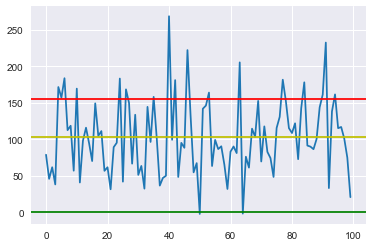

In [86]:
print('进行可视化-a交易者')

#a的期望值
a_mean=a_investor.mean()
#a交易者标准差
a_std=a_investor.std()

#绘制收益曲线

plt.plot(a_investor)

#水平直线-上线

plt.axhline(a_mean+a_std,color='r')

#均值期望线

plt.axhline(a_mean,color='y')

#水平直线-下线

plt.axhline(a_mean-a_mean,color='g')